# Chapter 15 - Stochastic Programs, Probability and Distributions

There is something very comforting about Newtonian mechanics. You push
down on one end of a lever, and the other end goes up. You throw a ball up in the
air; it travels a parabolic path, and eventually comes down. 𝐹 = 𝑚𝑎. In short, everything happens for a reason. *__The physical world is a completely predictable
place—all future states of a physical system can be derived from knowledge about
its current state__*.

For centuries, this was the prevailing scientific wisdom; then along came
quantum mechanics and *__the Copenhagen Doctrine. The doctrine’s proponents,
led by Bohr and Heisenberg, argued that at its most fundamental level the behavior of the physical world cannot be predicted__*. One can make probabilistic statements of the form “x is highly likely to occur,” but not statements of the form
“x is certain to occur.” Other distinguished physicists, most notably Einstein and
Schrödinger, vehemently disagreed.

This debate roiled the worlds of physics, philosophy, and even religion. The
heart of the debate was the validity of *__causal nondeterminism, i.e., the belief that
not every event is caused by previous events. Einstein and Schrödinger found this
view philosophically unacceptable__*, as exemplified by Einstein’s often-repeated
comment, “God does not play dice.” What they could accept was *__predictive nondeterminism, i.e., the concept that our inability to make accurate measurements
about the physical world makes it impossible to make precise predictions about
future states__*. This distinction was nicely summed up by *__Einstein, who said, “The
essentially statistical character of contemporary theory is solely to be ascribed to
the fact that this theory operates with an incomplete description of physical systems.”__*

The question of causal nondeterminism is still unsettled. However, whether
the reason we cannot predict events is because they are truly unpredictable or is
because we simply don't have enough information to predict them is of no practical importance.

While the Bohr/Einstein debate was about how to understand the lowest levels of the physical world, the same issues arise at the macroscopic level. Perhaps
the outcomes of horse races, spins of roulette wheels, and stock market investments are causally deterministic. However, there is ample evidence that it is perilous to treat them as predictably deterministic.

## 15.1 Stochastic Programs

*__A program is deterministic if whenever it is run on the same input, it produces
the same output__*. Notice that this is not the same as saying that the output is
completely defined by the specification of the problem. 

Not all interesting specifications can be met by deterministic implementations. Consider, for example, implementing a program to play a dice game, say
backgammon or craps. Somewhere in the program there may be a function that
simulates a fair roll of a single six-sided die.96 Suppose it had a specification
something like:

In [1]:
def rollDie():
    """Returns an integer between 1 and 6."""

This would be problematic, since it allows the implementation to return the
same number each time it is called, which would make for a pretty boring game.
It would be better to specify that *__rollDie “returns a randomly chosen int between
1 and 6,” thus requiring a stochastic implementation__*.

Most programming languages, including Python, include simple ways to
write stochastic programs, i.e., programs that exploit randomness. The tiny program below is a simulation model. Rather than asking some person to
roll a die multiple times, we wrote a program to simulate that activity. *__The code
uses one of several useful functions found in the imported Python standard library module random__*. As we saw earlier, the function random.choice takes a nonempty sequence as its argument and returns a randomly chosen member of that
sequence. *__Almost all of the functions in random are built using the function random.random, which, as we saw earlier in the book, generates a random floating
point number between 0.0 and 1.0__*.

In point of fact, *__the values returned by random.random are not truly random__*. They are what
mathematicians call *__pseudorandom__*. For almost all practical purposes, this distinction is not
relevant and we shall ignore it.

In [6]:
import random

def rollDie():
    """Returns a random integer between 1 and 6."""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [7]:
rollN(100)

4465412564114256214613315455251516536466441353626461254453533454643621125444651112645523163354526346


Now, imagine running rollN(10). Would you be more surprised to see it
print 1111111111 or 5442462412? Or, to put it another way, which of these two sequences is more random? It’s a trick question. Each of these sequences is equally
likely, because the value of each roll is independent of the values of earlier rolls.
*__In a stochastic process, two events are independent if the outcome of one event
has no influence on the outcome of the other__*.

This is a bit easier to see if we simplify the situation by thinking about a twosided die (also known as a coin) with the values 0 and 1. This allows us to think
of the output of a call of rollN as a binary number. When we use a binary die,
there are $2^n$ possible sequences that testN might return. Each of these sequences
is equally likely; therefore each has a probability of occurring of $\left( \frac{1}{2} \right)^n$.

Let’s go back to our six-sided die. How many different sequences are there of
length 10? $6^{10}$. So, the probability of rolling ten consecutive 1’s is $(1/6)^{10}$. Less than one out of sixty million. Pretty low, but no lower than the probability of any other sequence, e.g., 5442462412.

## 15.2 Calculating Simple Probabilities

In general, when we talk about the probability of a result having some property
(e.g., all 1’s) we are asking what fraction of all possible results has that property.
This is why probabilities range from 0 to 1. Suppose we want to know the probability of getting any sequence other than all 1’s when rolling the die. It is simply
1 – ((1/6)^10), because the probability of something happening and the probability
of the same thing not happening must add up to 1.
Suppose we want to know the probability of rolling the die ten times without
getting a single 1. One way to answer this question is to transform it into the
question of how many of the 610 possible sequences don’t contain a 1. This can be
computed as follows:

1. The probability of not rolling a 1 on any single roll is 5/6.
2. The probability of not rolling a 1 on either the first or the second roll is
(5/6)*(5/6), or (5/6)^2.
3. So, the probability of not rolling a 1 ten times in a row is (5/6)^10, slightly
more than 0.16.

Step 2 is an application of the multiplicative law for independent probabilities. Consider, for example, two independent events A and B. If A occurs one 1/3
of the time and B occurs 1/4 of the time, the probability that both A and B occur
is 1/4	of	1/3, i.e., (1/3)/4 or (1/3)*(1/4).

What about the probability of rolling at least one 1? It is simply 1 minus the
probability of not rolling at least one 1, i.e., 1 - (5/6)^10. Notice that this cannot be
correctly computed by saying that the probability of rolling a 1 on any roll is 1/6,
so the probability of rolling at least one 1 is 10*(1/6), i.e., 10/6. This is obviously
incorrect, since a probability cannot be greater than 1.

How about the probability of rolling exactly two 1’s in ten rolls? This is
equivalent to asking what fraction of the first 6^10 integers has exactly two 1’s in
its base 6 representation. We could easily write a program to generate all of these
sequences and count the number that contained exactly one 1. Deriving the
probability analytically is a bit tricky, and we defer it to Section 15.4.4.

## 15.2 Inferential Statistics

As we just saw, one can use a systematic process to derive the precise probability
of some complex event based upon knowing the probability of one or more simpler events. For example, one can easily compute the probability of flipping a
coin and getting ten consecutive heads based on the assumption that flips are independent and we know the probability of each flip coming up heads. Suppose,
however, that we don’t actually know the probability of the relevant simpler
event. *__Suppose, for example, that we don’t know whether the coin is fair__* (i.e., a
coin where heads and tails are equally likely).

All is not lost. *__If we have some data about the behavior of the coin, we can
combine that data with our knowledge of probability to derive an estimate of the
true probability__*. We can use inferential statistics to estimate the probability of a
single flip coming up heads, and then conventional probability to compute the
probability of a coin with that behavior coming up heads ten times in a row.

In brief (since this is not a book about statistics), the guiding principle of inferential statistics is that a random sample tends to exhibit the same properties as
the population from which it is drawn.

Suppose Harvey Dent (also known as Two-Face) flipped a coin, and it came
up heads. You would not infer from this that the next flip would also come up
heads. Suppose he flipped it twice, and it came up heads both time. You might
reason that the probability of this happening for a fair coin was 0.25, so there was
still no reason to assume the next flip would be heads. Suppose, however, 100 out
of 100 flips came up heads. (1/2)100 (the probability of this event, assuming a fair
coin) is a pretty small number, so you might feel safe in inferring that the coin
has a head on both sides.

Your belief in whether the coin is fair is based on the intuition that the behavior of a single sample of 100 flips is similar to the behavior of the population
of all samples of 100 flips. This belief seems pretty sound when all 100 flips are
heads. Suppose that 52 flips came up heads and 48 tails. Would you feel comfortable in predicting that the next 100 flips would have the same ratio of heads to
tails? For that matter, how comfortable would you feel about even predicting that
there would be more heads than tails in the next 100 flips? Take a few minutes to
think about this, and then try the experiment.

The following program simulates flipping a fair coin numFlips times,
and returns the fraction of those flips that came up heads. For each flip, the call
random.choice(('H', 'T')) randomly returns either 'H' or 'T'.

In [10]:
import random

def flip(numFlips):
    """Assumes numFlips>0 is an integer."""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    """Assumes both numFlipsPerTrial>0 and numTrials>0 are integers."""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

Try executing the function flipSim(10, 1) a couple of times. Here’s what we
saw the first two times we tried print('Mean =', flipSim(10, 1)):

In [23]:
print('Mean =', flipSim(10,1))
print('Mean =', flipSim(10,1))

Mean = 0.4
Mean = 0.2


It seems that it would be inappropriate to assume much (other than that the
coin has both heads and tails) from any one trial of 10 flips. That’s why we typically structure our simulations to include multiple trials and compare the results.
Let’s try flipSim(10, 100) a couple of times:

In [7]:
print('Mean =', flipSim(10,100))
print('Mean =', flipSim(10,100))

Mean = 0.49400000000000005
Mean = 0.5180000000000003


Do you feel better about these results? When we tried flipSim(100, 100000),
we got:

In [9]:
print('Mean =', flipSim(10,100000))
print('Mean =', flipSim(10,100000))

Mean = 0.500072999999998
Mean = 0.49974299999999794


This looks really good (especially since we know that the answer should be 0.5—
but that’s cheating). Now it seems we can safely conclude something about the
next flip, i.e., that heads and tails are about equally likely. But why do we think
that we can conclude that?

What we are depending upon is *__the law of large numbers. This law states that in repeated independent tests (flips in this case) with the same actual probability p of a particular outcome in each test (e.g., an actual probability of 0.5 of getting a head for each flip), the chance that
the fraction of times that outcome occurs differs from p converges to zero as the
number of trials goes to infinity__*.

It is worth noting that *__the law of large numbers does not imply, as too many
seem to think, that if deviations from expected behavior occur, these deviations
are likely to be “evened out” by opposite deviations in the future. This misapplication of the law of large numbers is known as the gambler’s fallacy__*.

*__People often confuse the gambler’s fallacy with regression to the mean. Regression to the mean states that following an extreme random event, the next
random event is likely to be less extreme__*. If you were to flip a fair coin six times
and get six heads, regression to the mean implies that the next sequence of six
flips is likely to have closer to the expected value of three heads. It does not imply, as the gambler’s fallacy suggests, that the next sequence of flips is likely to
have fewer heads than tails.

Success in most endeavors requires a combination of skill and luck. The skill
component determines the mean and the luck component accounts for the variability. The randomness of luck leads to regression to the mean.

The following code produces a plot illustrating regression
to the mean. The function regressToMean first generates numTrials trials of
numFlips coin flips each. It then *__identifies all trials where the fraction of heads
was either less than 1/3 or	more	than	2/3 and plots these extremal values as circles. Then, for each of these points, it plots the value of the subsequent trial as a
triangle in the same column as the circle__*.

The horizontal line at 0.5, the expected mean, is created using the axhline
function. The function pylab.xlim controls the extent of the x-axis. The function
call pylab.xlim(xmin, xmax) sets the minimum and maximum values of the x-axis
of the current figure. The function call pylab.xlim() returns a tuple composed of
the minimum and maximum values of the x-axis of the current figure. The
function pylab.ylim works the same way.

In [49]:
import pylab

def regressToMean(numFlips, numTrials):
    #Get fraction of Heads for each trials.
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    
    #Find trials with extreme results and for each the next trial.
    extremes, nextTrials = [], []
    for i in range(len(fracHeads)-1):
        if fracHeads[i]<0.33 or fracHeads[i]>0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
            
    #Plot extremes (list).
    pylab.plot(range(len(extremes)), extremes, 'ko', label='Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^', label='Next Trial')
    pylab.axhline(0.5) #Create horizontal line at 0.5
    pylab.ylim(0,1)
    pylab.xlim(-1, len(extremes)+1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc='best')

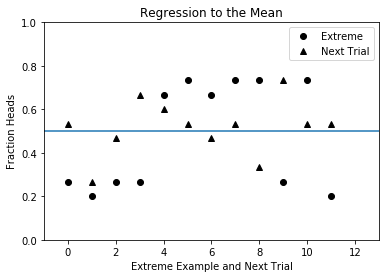

In [50]:
regressToMean(15,40)

__Finger exercise:__ Sally averages 5 strokes a hole when she plays golf. One day, she
took 40 strokes to complete the first nine holes. Her partner conjectured that she
would probably regress to the mean and take 50 strokes to complete the next
nine holes. Do you agree with her partner?

The following program contains *__a function, flipPlot, that produces two plots intended to show the law of large numbers at work__*. The first plot shows how the absolute value of the difference between the number of heads and number of tails changes with the number of flips. The second plot compares the ratio of heads to tails versus the number of flips. *__The line random.seed(0) near the bottom ensures that the pseudorandom number generator used by random.random will
generate the same sequence of pseudorandom numbers each time this code is executed__*. This is convenient for debugging. *__The function random.seed can be
called with any number. If it is called with no argument, the seed is chosen at
random__*.

In [44]:
import pylab

def flipPlot(minExp, maxExp):
    """Assumes minExp>0 and maxExp>0 are integers; minExp < maxExp. 
       Plot results of 2**minExp and 2**maxExp coin flips."""
    ratios, diffs, xAxis = [], [], []
    
    #create list for x-axis, where the x-axis is number of flips.
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp) 
    
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H','T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads-numTails))
        except ZeroDivisionError:
            continue
            
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads-#Tails)')
    pylab.plot(xAxis, diffs, 'ko')
    
    pylab.figure() #Show both figures instead of just the last one.

    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'ko')

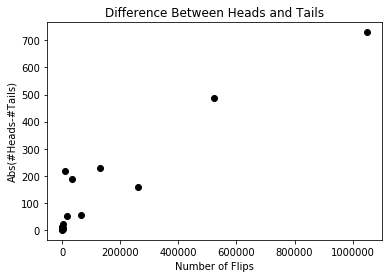

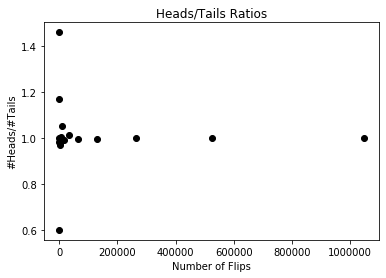

In [45]:
random.seed(0)
flipPlot(4,20)

The plot on the left seems to suggest that the absolute difference between the
number of heads and the number of tails fluctuates in the beginning, crashes
downwards, and then moves rapidly upwards. However, we need to keep in mind
that we have only two data points to the right of x	=	300,000. The fact that pylab.plot connected these points with lines may mislead us into seeing trends
when all we have are isolated points. This is not an uncommon phenomenon, so
you should always ask how many points a plot actually contains before jumping
to any conclusion about what it means.

It’s hard to see much of anything in the plot on the right, which is mostly a
flat line. This too is deceptive. Even though there are sixteen data points, most of
them are crowded into a small amount of real estate on the left side of the plot, so
that the detail is impossible to see. This occurs because the plotted points have x
values of 24,	25,	26,	…,	220, so the values on the x-axis range from 16	to over a million, and unless instructed otherwise PyLab will place these points based on their
relative distance from the origin. This is called *__linear scaling. Because most of the
points have x values that are small relative to 220, they will appear relatively close
to the origin__*.

Fortunately, these visualization problems are easy to address in PyLab. As we
saw in Chapter 11 and earlier in this chapter, we can easily instruct our program
to plot unconnected points, e.g., by writing pylab.plot(xAxis, diffs, 'ko').
Both plots in Figure 15.7 use a logarithmic scale on the x-axis. Since the x
values generated by flipPlot are $2^{minExp}$, $2^{minExp+1}$,..., $2^{maxExp}$, using a logarithmic
x-axis causes the points to be evenly spaced along the x-axis—providing maximum separation between points. The left-hand plot in Figure 15.7 uses a logarithmic scale on the y-axis as well as on the x-axis. The y values on this plot range
from nearly 0 to around 550. If the y-axis were linearly scaled, it would be difficult to see the relatively small differences in y values on the left side of the plot.
On the other hand, on the plot on the right the y values are fairly tightly grouped,
so we use a linear y-axis.

__Finger exercise:__ Modify the code in Figure 15.5 so that it produces plots like
those shown in Figure 15.7.

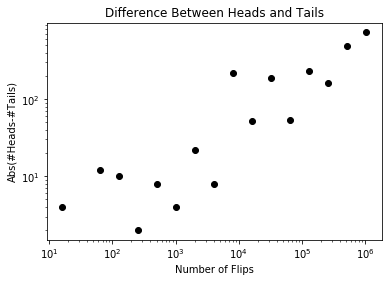

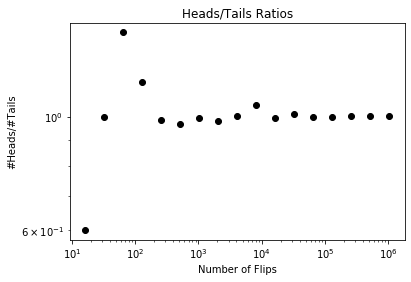

In [37]:
import pylab

def flipPlot(minExp, maxExp):
    """Assumes minExp>0 and maxExp>0 are integers; minExp < maxExp. 
       Plot results of 2**minExp and 2**maxExp coin flips."""
    ratios, diffs, xAxis = [], [], []
    
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp) #create list for x-axis, where the x-axis is number of flips.
    
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H','T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads-numTails))
        except ZeroDivisionError:
            continue
            
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads-#Tails)')
    pylab.plot(xAxis, diffs, 'ko')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()

    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'ko')
    pylab.semilogx()
    pylab.semilogy()

random.seed(0)
flipPlot(4,20)

These plots are easier to interpret than the earlier plots. The plot on the right
suggests pretty strongly that the ratio of heads to tails converges to 1.0 as the
number of flips gets large. The meaning of the plot on the left is a bit less clear. It
appears that the absolute difference grows with the number of flips, but it is not
completely convincing.

It is never possible to achieve perfect accuracy through sampling without
sampling the entire population. No matter how many samples we examine, we
can never be sure that the sample set is typical until we examine every element of
the population (and since we are often dealing with infinite populations, e.g., all
possible sequences of coin flips, this is often impossible). Of course, this is not to
say that an estimate cannot be precisely correct. We might flip a coin twice, get
one heads and one tails, and conclude that the true probability of each is 0.5. We
would have reached the right conclusion, but our reasoning would have been
faulty.

*__How many samples do we need to look at before we can have justified confidence in our answer? This depends on the variance in the underlying distribution__*. Roughly speaking, variance is a measure of how much spread there is in the
possible different outcomes. More formally, the variance of a collection of values,
𝑋, is defined as:

$Var(X) = \frac{\sum_{x \in X} (x-\mu)^2 }{\lvert X \rvert} $

where |𝑋| is the size of the collection and 𝜇 (mu) its mean. Informally, the variance describes what fraction of the values are close to the mean. If many values
are relatively close to the mean, the variance is relatively small. If many values are
relatively far from the mean, the variance is relatively large. If all values are the
same, the variance is zero.

*__The standard deviation of a collection of values is the square root of the variance. While it contains exactly the same information as the variance, the standard deviation is easier to interpret because it is in the same units as the original
data__*. For example, is easier to understand the statement “the mean height of a
population is 70 inches with a standard deviation of 4 inches,” than the sentence
“the mean of height of a population is 70 inches with a variance of 16 inches.”

The following code contains implementations of variance and standard deviation.

In [51]:
def variance(X):
    """Assumes that X is a list of numbers.
       Return the variance of X."""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    """Assumes that X is a list of numbers.
       Return the standard deviation of X."""
    return variance(X)**0.5

We can use the notion of standard deviation to think about the relationship
between the number of samples we have looked at and how much confidence we
should have in the answer we have computed. Figure 15.9 contains a modified
version of flipPlot. It uses the helper functions defined at the top of the figure to
run multiple trials of each number of coin flips, and then plots the means for
abs(heads - tails) and the heads/tails ratio. It also plots the standard deviation
of each. The helper function makePlot contains the code used to produce the
plots. The function runTrial simulates one trial of numFlips coins.

In [52]:
import pylab

def makePlot(xVals, yVals, title, xLabel, yLabel, style, logX=False, logY=False):
    """Return figure plot with xVals as x-axis and yVals as y-axis."""
    pylab.figure() #plot all figure instead of just the last figure.
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()
        
def runTrials(numFlips):
    """Run coin flipping (one trial only) for numFlips flips.
       Return both number of Heads and Tails."""
    numHeads=0
    for n in range(numFlips):
        if random.choice(('H','T')) == 'H':
            numHeads +=1
    numTails = numFlips - numHeads
    return (numHeads,numTails)

def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp>0, maxExp>0 and numTrials>0 are integers; minExp < maxExp.
       Plots summaries of results of numTrials trials of 2**minExp to 2**maxExp coin flips."""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    
    #Create lists for x-axis.
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp)
    
    #Create lists for y-axis.
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrials(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads-numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    
    #At this point we're ready to plot ratiosMeans, diffsMeans, ratiosSDs and diffsSDs.
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean of Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of Flips', 'Mean of Heads/Tails', 'ko', logX=True)
    
    title = 'Standard Deviation of Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of Flips', 'Standard Deviation', 'ko', logX=True,
             logY=True)

Let's try:

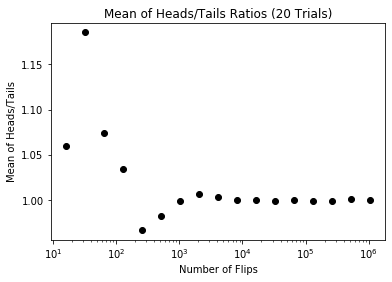

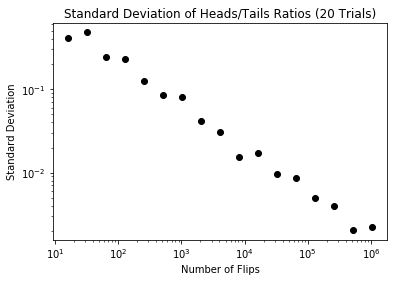

In [53]:
flipPlot1(4, 20, 20)

This is encouraging. *__The mean heads/tails ratio is converging towards 1 and
the log of the standard deviation is falling linearly with the log of the number of
flips per trial. By the time we get to about $10^{6}$ coin flips per trial, the standard
deviation (about $10^{-3}$) is roughly three decimal orders of magnitude smaller than
the mean (about 1), indicating that the variance across the trials was small__*. We
can, therefore, have considerable confidence that the expected heads/tails ratio is
quite close to 1.0. As we flip more coins, not only do we have a more precise answer, but more important, we also have reason to be more confident that it is
close to the right answer.

What about the absolute difference between the number of heads and the
number of tails? We can take a look at that by modify to the end of flipPlot1:

In [56]:
import pylab

def makePlot(xVals, yVals, title, xLabel, yLabel, style, logX=False, logY=False):
    """Return figure plot with xVals as x-axis and yVals as y-axis."""
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()
        
def runTrials(numFlips):
    """Run coin flipping (one trial only) for numFlips flips.
       Return both number of Heads and Tails."""
    numHeads=0
    for n in range(numFlips):
        if random.choice(('H','T')) == 'H':
            numHeads +=1
    numTails = numFlips - numHeads
    return (numHeads,numTails)

def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp>0, maxExp>0 and numTrials>0 are integers; minExp < maxExp.
       Plots summaries of results of numTrials trials of 2**minExp to 2**maxExp coin flips."""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    
    #Create lists for x-axis.
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp)
    
    #Create lists for y-axis.
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrials(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads-numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    
    #At this point we're ready to plot ratiosMeans, diffsMeans, ratiosSDs and diffsSDs.
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of Flips', 'Mean Heads/Tails', 'ko', logX=True)
    
    title = 'Standard Deviation of Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of Flips', 'Standard Deviation', 'ko', logX=True,
             logY=True)
    
    title = 'Mean abs(#Heads-#Tails) ' + numTrialsString
    makePlot(xAxis, diffsMeans, title, 'Number of Flips', 'Mean abs(#Heads-#Tails)', 'ko', logX=True,
             logY=True)
    
    title = 'Standard Deviation of abs(#Heads-#Tails) ' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of Flips', 'Standard Deviation', 'ko', logX=True,
             logY=True)

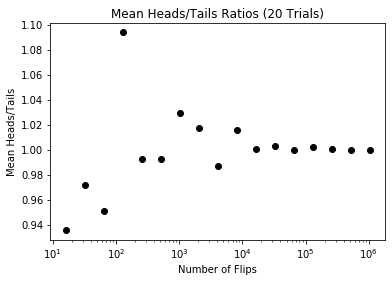

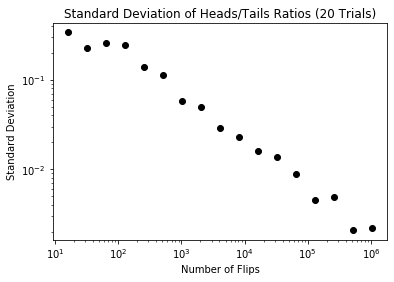

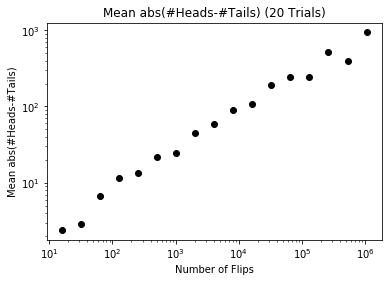

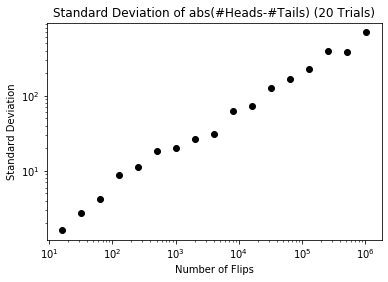

In [57]:
flipPlot1(4, 20, 20)

As expected, the absolute difference between the numbers of heads and tails
grows with the number of flips. Furthermore, since we are averaging the results
over twenty trials, the plot is considerably smoother than when we plotted the
results of a single trial in Figure 15.7. But what’s up with the plot on the right of
Figure 15.12? The standard deviation is growing with the number of flips. Does
this mean that as the number of flips increases we should have less rather than
more confidence in the estimate of the expected value of the difference between
heads and tails?

No, it does not. *__The standard deviation should always be viewed in the context of the mean__*. If the mean were a billion and the standard deviation 100, we
would view the dispersion of the data as small. But if the mean were 100 and the
standard deviation 100, we would view the dispersion as large.

*__The coefficient of variation is the standard deviation divided by the mean.
When comparing data sets with different means (as here), the coefficient of variation is often more informative than the standard deviation__*. Note that the coefficient of variation is not defined
when the mean is 0.

In [60]:
def CV(X):
    """Calculate the coefficient of variation: SD divided by the mean."""
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

In [65]:
def runTrials(numFlips):
    """Run coin flipping (only one trial) for numFlips flips."""
    numHeads=0
    for n in range(numFlips):
        if random.choice(('H','T')) == 'H':
            numHeads +=1
    numTails = numFlips - numHeads
    return (numHeads,numTails)


def flipPlot2(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp. numTrials a positive integer
       Plots summaries of results of numTrials trials of 2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs, xAxis = [], [], []
    
    #create x-axis.
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp) 
        
    #simulate coin flipping for each numFlips in the x-axis.
    for numFlips in xAxis:
        ratios, diffs = [], []
        
        #For each numFlips flips, repeat exp. for numTrials trials.
        for t in range(numTrials):
            numHeads, numTails = runTrials(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
            
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
      
    #At this point we're ready to plot  ratiosMeans, diffsMeans,
    #ratiosSDs, diffsSDs, ratiosCVs and diffsCVs.
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean of Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips',
    'Mean Heads/Tails', 'ko', logX = True)
    
    title = 'SD of Heads/Tails Ratios ' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of flips',
    'Standard Deviation', 'ko', logX = True, logY = True)
    
    title = 'Mean of abs(#Heads - #Tails) ' + numTrialsString
    makePlot(xAxis, diffsMeans, title,'Number of Flips',
    'Mean of abs(#Heads - #Tails)', 'ko',
    logX = True, logY = True)
    
    title = 'SD of abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of Flips',
    'Standard Deviation', 'ko', logX = True, logY = True)
    
    title = 'Coeff. of Var. of Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of Flips',
    'Coeff. of Var.', 'ko', logX = True, logY = True)
    
    title = 'Coeff. of Var. of abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of Flips',
    'Coeff. of Var.', 'ko', logX = True)

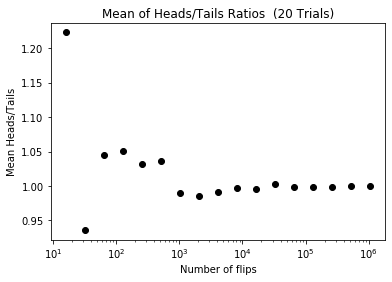

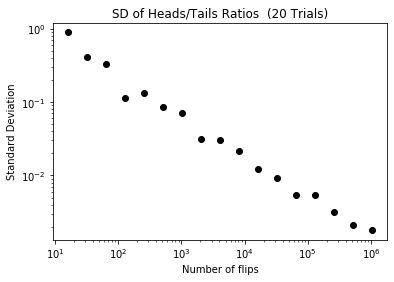

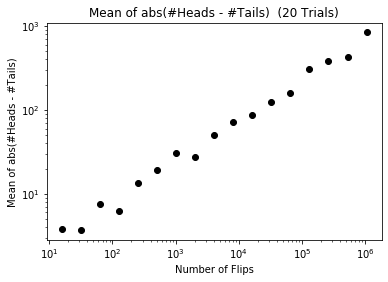

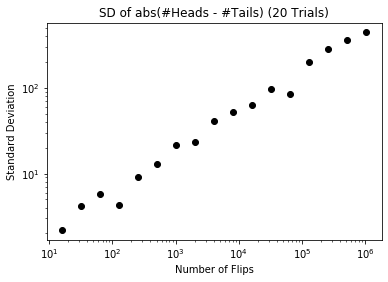

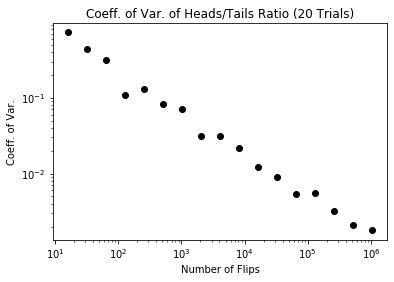

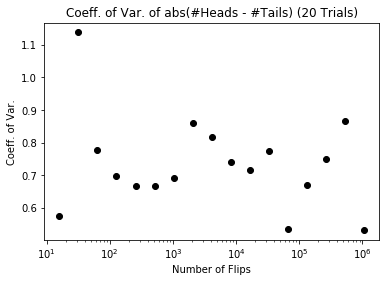

In [66]:
flipPlot2(4, 20, 20)

In this case we see that the plot of coefficient of variation for the heads/tails
ratio is not much different from the plot of the standard deviation in Figure
15.10. This is not surprising, since the only difference between the two is the division by the mean, and since the mean is close to 1 that makes little difference.

On the other hand, the plot of the coefficient of variation for the absolute difference between heads and tails is a different story. While the standard deviation
exhibited a clear trend in Figure 15.12, it would take a brave person to argue that
the coefficient of variation is trending in any direction. It seems to be fluctuating
wildly. *__This suggests that dispersion in the values of abs(heads – tails) is independent of the number of flips. It’s not growing, as the standard deviation might
have misled us to believe, but it’s not shrinking either__*. Perhaps a trend would appear if we tried 1000 trials instead of 20. Let’s see.

In [67]:
def runTrials(numFlips):
    """Run coin flipping (only one trial) for numFlips flips."""
    numHeads=0
    for n in range(numFlips):
        if random.choice(('H','T')) == 'H':
            numHeads +=1
    numTails = numFlips - numHeads
    return (numHeads,numTails)


def flipPlot2(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp. numTrials a positive integer
       Plots summaries of results of numTrials trials of 2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs, xAxis = [], [], []
    
    #create x-axis.
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp) 
        
    #simulate coin flipping for each numFlips in the x-axis.
    for numFlips in xAxis:
        ratios, diffs = [], []
        
        #For each numFlips flips, repeat exp. for numTrials trials.
        for t in range(numTrials):
            numHeads, numTails = runTrials(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
            
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
      
    #At this point we're ready to plot  ratiosMeans, diffsMeans,
    #ratiosSDs, diffsSDs, ratiosCVs and diffsCVs.
#     numTrialsString = ' (' + str(numTrials) + ' Trials)'
#     title = 'Mean of Heads/Tails Ratios ' + numTrialsString
#     makePlot(xAxis, ratiosMeans, title, 'Number of flips',
#     'Mean Heads/Tails', 'ko', logX = True)
    
#     title = 'SD of Heads/Tails Ratios ' + numTrialsString
#     makePlot(xAxis, ratiosSDs, title, 'Number of flips',
#     'Standard Deviation', 'ko', logX = True, logY = True)
    
#     title = 'Mean of abs(#Heads - #Tails) ' + numTrialsString
#     makePlot(xAxis, diffsMeans, title,'Number of Flips',
#     'Mean of abs(#Heads - #Tails)', 'ko',
#     logX = True, logY = True)
    
    title = 'SD of abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of Flips',
    'Standard Deviation', 'ko', logX = True, logY = True)
    
#     title = 'Coeff. of Var. of Heads/Tails Ratio' + numTrialsString
#     makePlot(xAxis, ratiosCVs, title, 'Number of Flips',
#     'Coeff. of Var.', 'ko', logX = True, logY = True)
    
    title = 'Coeff. of Var. of abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of Flips',
    'Coeff. of Var.', 'ko', logX = True)

In [68]:
flipPlot2(4, 20, 1000)

KeyboardInterrupt: 

## 15.4 Distributions

*__A histogram is a plot designed to show the distribution of values in a set of data__*.
The values are first sorted, and then divided into a fixed number of equal-width
bins. A plot is then drawn that shows the number of elements in each bin.

Text(0, 0.5, 'Number of Occurences.')

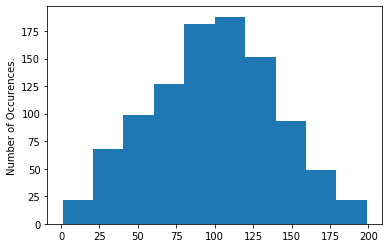

In [71]:
import pylab

vals = []
for i in range(1000):
    num1 = random.choice(range(0,101))
    num2 = random.choice(range(0,101))
    vals.append(num1+num2)
    
pylab.hist(vals, bins = 10)
pylab.ylabel('Number of Occurences.')

The function call pylab.hist(vals, bins = 10) produces a histogram with ten
bins. PyLab has automatically chosen the width of each bin based on the number
of bins and the range of values. Looking at the code, we know that the smallest
number that might appears in vals is 0 and the largest number 200. Therefore,
the possible values on the x-axis range from 0 to 200. Each bin represents an
equal fraction of the values on the x-axis, so the first bin will contain the elements 0-19, the next bin the elements 20-39, etc.

__Finger exercise:__ In Figure 15.18, why are the bins near the middle of the histogram taller than the the bins near the sides? Hint: think about why 7 is the most
common outcome of rolling a pair of dice.

By now you must be getting awfully bored with flipping coins. Nevertheless,
we are going to ask you to look at yet one more coin-flipping simulation. The
simulation in Figure 15.19 illustrates more of PyLab’s plotting capabilities, and
gives us an opportunity to get a visual notion of what standard deviation means.
It produces two histograms. The first shows the result of a simulation of 100,000
trials of 100 flips of a fair coin. The second shows the result of a simulation of
100,000 trials of 1,000 flips of a fair coin.

The method pylab.annotate is used to place some statistics on the figure
showing the histogram. The first argument is the string to be displayed on the
figure. The next two arguments control where the string is placed. The argument
xycoords = 'axes fraction' indicates the placement of the text will be expressed as
a fraction of the width and height of the figure. The argument xy = (0.67, 0.5)
indicates that the text should begin two thirds of the way from the left edge of the
figure and half way from the bottom edge of the figure.

In [73]:
import random

def flip(numFlips):
    """Assumes numFlips>=0 is an integer.
       Return thr fraction of Heads in a single trial."""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/float(numFlips)

def flipSim(numFlipsPerTrial, numTrials):
    """Run numTrials trials of coin flipping and return
       mean & SD of fraction of Heads for each trial."""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of ' + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean = ' + str(round(mean,4))\
                  + '\nSD = ' + str(round(sd,4)), size = 'x-large',
                  xycoords = 'axes fraction', xy = (0.67,0.70))
    
def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins=20)
    xmin, xmax = pylab.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins=20)
    pylab.xlim(xmin,xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

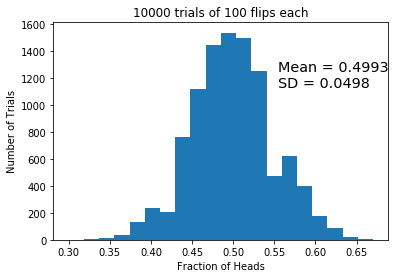

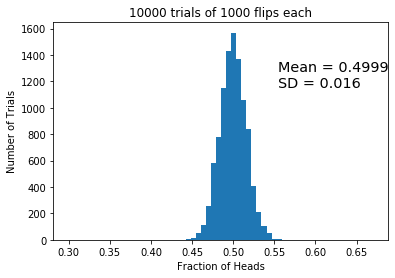

In [76]:
makePlots(100, 1000, 10000)

To facilitate comparing the two figures, we have used pylab.xlim to force the
bounds of the x-axis in the second plot to match those in the first plot, rather
than letting PyLab choose the bounds.

When the code in Figure 15.19 is run, it produces the plots in Figure 15.20.
Notice that while the means in both plots are about the same, the standard deviations are quite different. *__The spread of outcomes is much tighter when we flip the
coin 1000 times per trial than when we flip the coin 100 times per trial.__*

### 15.4.1 Probability Distributions

A histogram is a depiction of a frequency distribution. It tells us how often a random variable has taken on a value in some range, e.g., how often the fraction of
times a coin came up heads was between 0.4 and 0.5. It also provides information
about the relative frequency of various ranges. For example, we can easily see that
the fraction of heads falls between 0.4 and 0.5 far more frequently than it falls between 0.3 and 0.4. A probability distribution captures the notion of relative frequency by giving the probability of a random value taking on a value within a
range.

Probability distributions fall into two groups: discrete probability distributions and continuous probability distributions, depending upon whether they define the probability distribution for a discrete or a continuous random variable.
A discrete random variable can take on one of a finite set of values, e.g., the values associated with a roll of a die. A continuous random variable can take on any
of the infinite real values between two real numbers, e.g., the speed of a car traveling between 0 miles per hour and the car’s maximum speed.

Discrete probability distributions are easier to describe. Since there are a finite number of values that the variable can take on, the distribution can be described by simply listing the probability of each value.

Continuous probability distributions are trickier. Since there are an infinite
number of possible values, the probability that a continuous random variable will
take on a specific value is usually 0. For example, the probability that a car is
travelling at exactly 81.3457283 miles per hour is probably 0. Mathematicians
like to describe continuous probability distributions using a probability density
function, often abbreviated as PDF. A PDF describes the probability of a random
variable lying between two values. Think of the PDF as defining a curve where
the values on the x-axis lie between the minimum and maximum value of the
random variable. (In some cases the x-axis is infinitely long.) Under the assumption that x1 and x2 lie in the domain of the random variable, the probability of the
variable having a value between x1 and x2 is the area under the curve between x1
and x2. Figure 15.21 shows the probability density functions for the expressions
random.random() and random.random() + random.random().

![](random_random.jpg)

For random.random() the area under the curve from 0 to 1 is 1. This makes
sense because we know that the probability of random.random() returning a value
between 0 and 1 is 1. On the other hand, if we consider the area under the part of
the curve for random.random() between 0.2 and 0.4,	it is 0.2—indicating that the
probability of random.random() returning a value between 0.2 and 0.4 is 0.2. Similarly, the area under the curve for random.random() + random.random() from 0 to 2
is 1, and the area under the curve from 0 to 1 is 0.5. Notice, by the way that the
PDF for random.random() indicates that every possible interval of the same length
has the same probability, whereas the PDF for random.random() + random.random()
indicates that some intervals are more probable than others.

### 15.4.2 Normal Distributions

A normal or Gaussian distribution is defined by the PDF:

$P(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[- \frac{(x-\mu)^2}{2\sigma^2}\right]$

If you don’t feel like studying this equation, that’s fine. Just remember that
normal distributions peak at the mean, fall off symmetrically above and below
the mean, and asymptotically approach 0. They have the nice mathematical
property of being completely specified by two parameters: the mean and the
standard deviation (the only two parameters in the equation). Knowing these is
equivalent to knowing the entire distribution. The shape of the normal distribution resembles (in the eyes of some) that of a bell, so it sometimes is referred to as
a bell curve.

Figure 15.22 shows part of the PDF for a normal distribution with a mean of
0 and and standard deviation of 1. We can only show a portion of the PDF, because the tails of a normal distribution converge towards 0, but don’t reach it. In
principle, no value has a zero probability of occurring.

![](normal_dist.jpg)

Normal distributions can be easily generated in Python programs by calling
random.gauss(mu, sigma), which returns a randomly chosen floating point number
from a normal distribution with mean and standard deviation sigma.
Normal distributions are frequently used in constructing probabilistic models because they have nice mathematical properties. Of course, finding a mathematically nice model is of no use if it provides a bad model of the actual data.

Fortunately, many random variables have an approximately normal distribution.
For example, physical properties of plants and animals (e.g., height, weight, body
temperature) typically have approximately normal distributions. Importantly,
*__many experiments have normally distributed measurement errors. This assumption was used in the early 1800s by the German mathematician and physicist Karl
Gauss, who assumed a normal distribution of measurement errors in his analysis
of astronomical data__* (which led to the normal distribution becoming known as
the Gaussian distribution in much of the scientific community).

One of the nice properties of normal distributions is that independent of the
mean and standard deviation, the number of standard deviations from the mean
needed to encompass a fixed fraction of the data is a constant. For example,
*__~68.27% of the data will always lie with one standard deviation of the mean,
~95.45% within two standard deviations of the mean, and ~99.73% within three
standard deviations of the mean. This is sometimes called the 68-95-99.7 rule,
but is more often called the empirical rule__*.

The rule can be derived by integrating the formula defining a normal distribution to get the area under the curve. Looking at Figure 15.22, it is easy to believe that roughly two thirds of the total area under the curve lies between –1
and 1, roughly 95% between -2 and 2, and almost all of it between -3 and 3. But
that’s only one example, and it is always dangerous to generalize from a single example. We could accept the empirical rule on the unimpeachable authority of
Wikipedia. However, just to be sure, and as an excuse to introduce a Python library worth knowing about, let’s check it ourselves.

The SciPy library contains many mathematical functions commonly used by
scientists and engineers. SciPy is organized into modules covering different scientific computing domains, such as signal processing and image processing. We
will use a number of functions from SciPy later in this book. Here we use the
function scipy.integrate.quad, which finds an approximation to the value of integrating a function between two points.

The function scipy.integrate.quad has three required parameters and one
optional parameter:
* a function or method to be integrated (if the function takes more than one argument, it is integrated along the axis corresponding to the first argument).
* a number representing the lower limit of the integration,
* a number representing the upper limit of the integration, and
* an optional tuple supplying values for all arguments, except the first, of the
function to be integrated.

The quad function returns a tuple of two floating point numbers. The first is
an approximation to the value of the integral, and the second an estimate of the
absolute error in the result.

Consider, for example, evaluating the integral of the unary function abs in
the interval 0 to 5. We don’t need any fancy math to compute the area under this
curve: it’s simply the area of a right triangle with base and altitude of length 5,
i.e., 12.5. So, it shouldn’t be a surprise that

In [95]:
from scipy import integrate

scipy.integrate.quad(abs,0,5)

(12.5, 1.3877787807814457e-13)

The following code computes the area under portions of normal distributions for some randomly chosen means and standard deviations. 

In [98]:
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10,10)
        sigma = random.randint(1,10)
        print('For mu =', mu, 'and sigma =', sigma, ':')
        for numStd in (1,2,3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma, mu+numStd*sigma, (mu,sigma))[0]
            print('  Fraction within', numStd, 'std =', round(area,4))
            
checkEmpirical(3)

For mu = -4 and sigma = 4 :
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973
For mu = 2 and sigma = 6 :
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973
For mu = -4 and sigma = 5 :
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973


People frequently use the empirical rule to derive confidence intervals. Instead of estimating an unknown value (e.g., the expected number of heads) by a
single value, *__a confidence interval provides a range that is likely to contain the
unknown value and a degree of confidence that the unknown value lies within
that range__*. For example, a political poll might indicate that a candidate is likely to
get *__52% of the vote ±4% (i.e., the confidence interval is of size 8) with a confidence level of 95%. What this means is that the pollster believes that 95% of the
time the candidate will receive between 48% and 56% of the vote__*. Together the
confidence interval and the confidence level are intended to indicate the reliability of the estimate. Almost always, *__increasing the confidence level will require
widening the confidence interval__*.

Suppose that we run 100 trials of 100 coin flips each. Suppose further that
the mean fraction of heads is 0.4999 and the standard deviation 0.0497. For reasons we will discuss in Section 17.2, we can assume that the distribution of the
means of the trials was normal. Therefore, we can conclude that if we conducted
more trials of 100	flips each,

* approximately 95% of the time the fraction of heads will be 0.4999	±0.0994 and
* more than 99%	of the time the fraction of heads will be 0.4999	±0.1491

It is often useful to visualize confidence interval using error bars as shown in the following code:

In [99]:
import pylab

def showErrorBars(minExp, maxExp, numTrials):
    """Assumes minExp>0 and maxExp<0 are integers with minExp < maxExp.
       numTrials>0 is an integer. This funcion plot the mean of fraction
       of heads with error bars."""
    means, sds, xVals = [], [], []
    
    for exp in range(minExp, maxExp+1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
        
    pylab.errorbar(xVals, means, yerr = 1.96*pylab.array(sds))
    pylab.semilogx()
    pylab.title('Mean Fraction of Heads (' + str(numTrials) + ' trials)')
    pylab.xlabel('Number of flips per trial')
    pylab.ylabel('Fraction of heads and 95% confidence')

The function showErrorBars calls flipSim and the uses:
    
    pylab.errorbar(xVals, means, yerr = 1.96*pylab.array(sds))
    
to produce error bar plot. The first two arguments give the x and y values to be plotted.
The third argument says that the values in sds should be multiplied by 1.96 and
used to create vertical error bars. We multiply by 1.96 because 95% of the data in
a normal distribution falls within 1.96 standard deviations of the mean. Let's try the code:

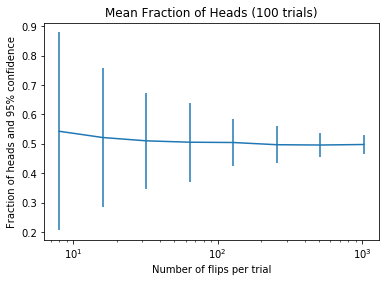

In [100]:
showErrorBars(3,10,100)

Unsurprisingly, the error bars shrink (the standard deviation gets smaller) as the number of flips per trial grows.

### 15.4.3 Continuous and Discrete Uniform Distribution

A uniform distribution can be either discrete or continuous. A continuous
uniform distribution also called a rectangular distribution, has the property that
all intervals of the same length have the same probability. Consider the function
random.random. As we saw in Section 15.4.1, the area under the PDF for any interval of a given length is the same. For example, the area under the curve between
0.23 and 0.33 is the same as the area under the curve between 0.53 and 0.63.

One can fully characterize a continuous uniform distribution with a single
parameter, its range (i.e., minimum and maximum values). If the range of possible values is from 𝑚𝑖𝑛 to 𝑚𝑎𝑥, the probability of a value falling in the range 𝑥 to
𝑦 is given by:

$ 
  P(x,y) =
  \begin{cases}
      \frac{y-x}{max-min} & \text{if $x \geq min$ and $y \leq max$} \\
                      0   & \text{otherwise}
  \end{cases}
$

Elements drawn from a continuous uniform distributions can be generated
by calling random.uniform(min, max), which returns a randomly chosen floating
point number between min and max.
Discrete uniform distributions occur when each possible value occurs equally often, but the space of possible values is not continuous. For example, when a
fair die is rolled, each of the six possible values is equally probable, but the outcomes are not uniformly distributed over the real numbers between 1 and 6—
most values, e.g., 2.5, have a probability of 0 and a few values, e.g. 3, have a probability of $\frac{1}{6}$.

One can fully characterize a discrete uniform distribution by :

$ P(x) = 
    \begin{cases}
        \frac{1}{|S|} & \text{if $x \in S$} \\
        0             & \text{otherwise}
    \end{cases}
$

where $S$ is the set of possible values and $|S|$ the number of elements in $S$.

### 15.4.4 Binomial and Multinomial Distributions

Random variables that can take on only a discrete set of values are called categorical (also nominal or discrete) variables.

When a categorical variable has only two possible values (e.g., success or failure), the probability distribution is called a binomial distribution. One way to
think about a binomial distribution is as the probability of a test succeeding exactly k times times in n independent trials. If the probability of a success in a single trial is p, the probability of exactly k successes in n independent trials is given
by the formula :

$ {n \choose x}p^{k}(1-p)^{n-k}  $  where $ {n \choose k} = \frac{n!}{k!(n-k)!} $. The formula ${n \choose k}$ is known as the binomial coefficient. One way to read it is as "n choose k", since it is equivalent to the number of subsets of size k that can be constructed from a set of size n.

In Section 15.2, we asked about the probability of rolling exactly two 1’s in
ten rolls of a die. We now have the tools in hand to calculate this probability.
Think of the ten rolls as ten independent trials, where the trial is a success if a 1 is
rolled and a failure otherwise. The binomial distribution tells us that the probability of having exactly two successful trials out of ten is :

$ {10 \choose 2} {\left( \frac{1}{6} \right)}^2 {\left( \frac{5}{8} \right)}^8 \approx 0.291 $

__Finger exercise:__ Implement a function that calculates the probability of rolling
exactly two 3’s in k rolls of a fair die. Use this function to plot the probability as k
varies from 2 to 100.

The multinomial distribution is a generalization of the binomial distribution
to categorical data with more than two possible values. It applies when there are
n independent trials each of which has m mutually exclusive outcomes, with each
outcome having a fixed probability of occurring. The multinomial distribution
gives the probability of any given combination of numbers of occurrences of the
various categories.

### 15.4.5 Exponential and Geometric Distribution

*__Exponential distributions occur quite commonly. They are often used to model
inter-arrival times__*, e.g., of cars entering a highway or requests for a Web page.

Consider, for example, *__the concentration of a drug in the human body. Assume that at each time step each molecule has a constant probability p of being
cleared__* (i.e., of no longer being in the body). The system is memoryless in the
sense that at each time step the probability of a molecule being cleared is independent of what happened at previous times. At time t	=	0, the probability of an
individual molecule still being in the body is 1. At time t	=	1, the probability of
that molecule still being in the body is 1	- p. At time t	=	2, the probability of that
molecule still being in the body is (1	– p)2. More generally, *__at time $t$ the probability of an individual molecule having survived is $(1-p)^t$, i.e., it is exponential in $t$__*.

Suppose that at time $t_{0}$ there are $M_{0}$ molecules of the drug. In general, at time
$t$, the number of molecules will be $M_{0}$ multiplied by the probability that an individual module has survived to time $t$. The function clear implemented in Figure
15.26 plots the expected number of remaining molecules versus time.

In [103]:
import pylab

def clear(n,p, steps):
    """Assumes n>0 and steps>0 are integer, p a float.
       n: the initial number of molecules.
       p: the probability of a molecule being cleared.
       steps: the length of the simulation."""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecules Remaining')
    pylab.title('Clearance of Drug')

Let's try the code:

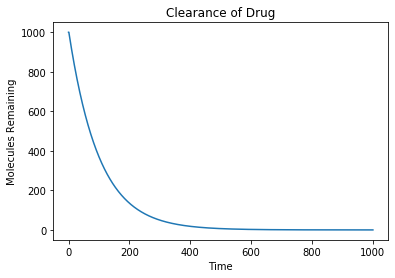

In [104]:
clear(1000, 0.01, 1000)

This is an example of *__exponential decay__*. In practice, *__exponential decay is often talked about in terms of half-life, i.e., the expected time required for the initial value to decay by 50%__*. One can also talk about the half-life of a single item.
For example, the half-life of a single molecule is the time at which the probability
of that molecule having been cleared is 0.5. Notice that as time increases, the
number of remaining molecules approaches 0. But it will never quite get there.
This should not be interpreted as suggesting that a fraction of a molecule remains. Rather it should be interpreted as saying that since the system is probabilistic, one can never guarantee that all of the molecules have been cleared.

What happens if we make the y-axis logarithmic (by using pylab.semilogy)?

In [105]:
import pylab

def clear(n,p, steps):
    """Assumes n>0 and steps>0 are integer, p a float.
       n: the initial number of molecules.
       p: the probability of a molecule being cleared.
       steps: the length of the simulation."""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecules Remaining')
    pylab.title('Clearance of Drug')
    pylab.semilogy()

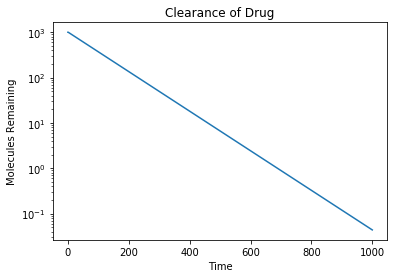

In [106]:
clear(1000, 0.01, 1000)

We see that the values on the y-axis
are changing exponentially quickly relative to the values on the x-axis. If we make
the y-axis itself change exponentially quickly, we get a straight line. *__The slope of
that line is the rate of decay__*.

Exponential growth is the inverse of exponential decay. It too is quite commonly seen in nature. Compound interest, the growth of algae in a swimming
pool, and the chain reaction in an atomic bomb are all examples of exponential
growth.

Exponential distributions can easily be generated in Python by calling the
function random.expovariate(lambd),105 where lambd is 1.0 divided by the desired
mean. The function returns a value between 0 and positive infinity if lambd is
positive, and between negative infinity and 0 if lambd is negative.

*__The geometric distribution is the discrete analog of the exponential distribution__*. It is usually thought of as *__describing the number of independent attempts
required to achieve a first success (or a first failure)__*. Imagine, for example, that
you have a balky car that starts only half of the time you turn the key (or push the
starter button). A geometric distribution could be used to characterize the expected number of times you would have to attempt to start the car before being
successful. The following code produce histogram that visualize the problem.

Text(0.5, 1.0, 'Probability of Starting Each Try = 0.5')

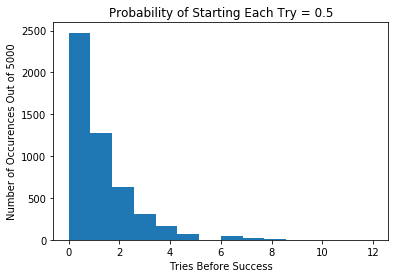

In [5]:
import random
import pylab

def successStart(successProb, numTrials):
    """Assumes successProb is a float rep probability of a single attempt being
       successfull. numTrials>0 is an integer. Return a list of the number of 
       attempts needed before a success for each trial."""
    
    triesBeforeSuccess = []
    
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:
            consecFailures += 1
        triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

probOfSuccess = 0.5
numTrials = 5000
distribution = successStart(probOfSuccess, numTrials)

pylab.hist(distribution, bins=14)
pylab.xlabel('Tries Before Success')
pylab.ylabel('Number of Occurences Out of ' + str(numTrials))
pylab.title('Probability of Starting Each Try = ' + str(probOfSuccess))

The histogram implies that most of the time you’ll get the car going within a
few attempts. On the other hand, the long tail suggests that on occasion you may
run the risk of draining your battery before the car gets going.

### 15.4.6 Benford's Distribution

Benford’s law defines a really strange distribution. Let S be a large set of decimal
integers. How frequently would you expect each nonzero digit to appear as the
first digit? Most of us would probably guess one ninth of the time. And when
people are making up sets of numbers (e.g., faking experimental data or perpetrating financial fraud) this is typically true. It is not, however, typically true of
many naturally occurring data sets. Instead, they follow a distribution predicted
by Benford’s law.

*__A set of decimal numbers is said to satisfy Benford’s law if the probability
of the first digit being d is consistent with $P(d) = \log_{10} \left( 1+ \frac{1}{d} \right)$.__*
For example, this law predicts that the probability of the first digit being 1 is
about	30%! Shockingly, many actual data sets seem to observe this law. It is possible to show that the Fibonacci sequence, for example, satisfies it perfectly.
That’s kind of plausible, since the sequence is generated by a formula. It’s less
easy to understand why such diverse data sets as iPhone pass codes, the number
of Twitter followers per user, the population of countries, or the distances of stars
from the earth closely approximate Benford’s law.

## 15.5 Hashing and Collisions

## 15.6 How Often Does the Better Team Win